In [2]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# STATS 306
## Homework 5: Relational Data and SQL

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE". All of the problems in this problem set use the `nycflights13` data:

This package provides the following data tables.

* `?flights`: all flights that departed from NYC in 2013
* `?weather`: hourly meterological data for each airport
* `?planes`: construction information about each plane
* `?airports`: airport names and locations
* `?airlines`: translation between two letter carrier codes and names

In [3]:
install.packages('nycflights13') # if necessary

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(nycflights13)

In [ ]:
flights %>%
  print

## Problem 1: Joins (4 points)


**(a)** Is there a relationship between a) a plane's age, and b) the proportion of flights schedule to use that plane that got cancelled? Here we consider a flight cancellation to be when `dep_time` is `NA` as described in HW 3 Problem 1 (b): 1 point

`summarise()` has grouped output by 'tailnum'. You can override using the
`.groups` argument.
Joining with `by = join_by(tailnum)`


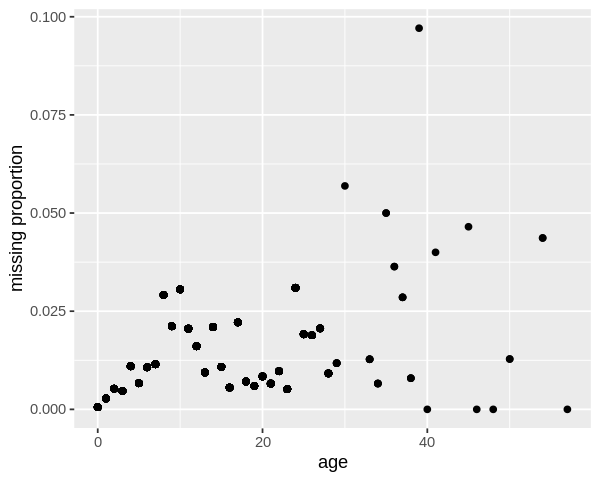

In [ ]:
# Your solution here
flights %>%
  mutate(operate = ifelse(!is.na(dep_time),0,1)) %>%
  group_by(tailnum) %>%
  mutate(miss = mean(operate)) %>% 
  group_by(tailnum, miss) %>%
  summarise %>%
  left_join(planes) %>%
  mutate(age = 2013 - as.integer(year)) %>%
  group_by(age) %>%
  mutate(miss_new = mean(miss)) %>%
  group_by(age, miss_new) %>%
  filter(!is.na(age)) %>%
  ggplot(aes(x = age, y = miss_new)) +
  geom_point() +
  ylab("missing proportion")

# graph shows trend that younger plane with less missing proportion 
# but the strength is weak, so not really reliable
# one outlier is one at the top right (near age = 40), as it has unusual high missing 
# proportion compare to slope of the graph

**(b)** Are some planes used by multiple carriers? (Recall that each plane is uniquely identified by its `tailnum`.) _1 point_

In [ ]:
# Your solution here
flights %>%
  group_by(tailnum) %>%
  summarise %>%
  nrow()

flights %>%
  group_by(tailnum, carrier) %>%
  summarise %>%
  nrow()

# yes, there are at most 23 flights that used by multiple carrier 
# there is 4044 unique tailnum, but 4067 combination of tailnum and carrier

[1] 4044

`summarise()` has grouped output by 'tailnum'. You can override using the
`.groups` argument.


[1] 4067

install.packages("maps")In the next few problems you are asked to draw some data on a map of the United States. Fortunately, this is easy to do using `ggplot`. Here is an example which draws the location of each airport in the dataset:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



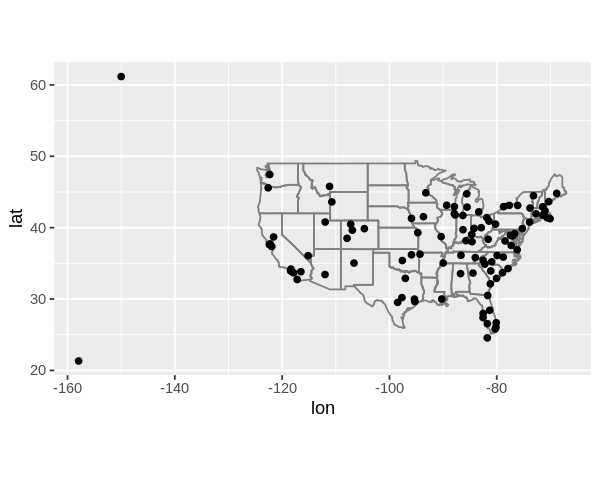

In [ ]:
install.packages("maps") # if necessary
airports  %>% 
  semi_join(flights, by=c("faa"="dest")) %>% 
  ggplot(aes(x = lon, y = lat)) +
    borders("state") +
    geom_point() +
    coord_quickmap()

**(c)** For each destination in the continental U.S., compute the average arrival delay to that destination, and draw them on a map: _1 point_

Warning message in left_join(., flights, by = c(faa = "dest")):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 88 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


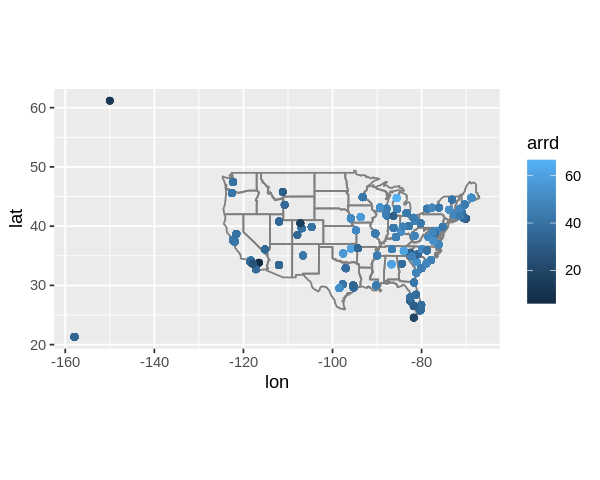

In [ ]:
# Your solution here
airports %>%
  left_join(flights, by=c("faa"="dest")) %>%
  group_by(faa) %>%
  filter(!is.na(arr_delay), arr_delay > 0) %>%
  mutate(arrd = mean(arr_delay)) %>%
  group_by(faa, lon, lat, arrd) %>%
  ggplot(aes(x = lon, y = lat)) +
  borders("state") +
  geom_point(aes(col = arrd)) + 
  coord_quickmap()

**(d)** Draw a map of the total number of passengers that flew from NYC to each destination airport in the continental US. (Hint: assume every flight was full, and use the `seats` variable in `planes` to estimate the number of passengers.) _1 point_

Warning message in left_join(., flights, by = c(faa = "dest")):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 88 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”
Joining with `by = join_by(year, tailnum)`


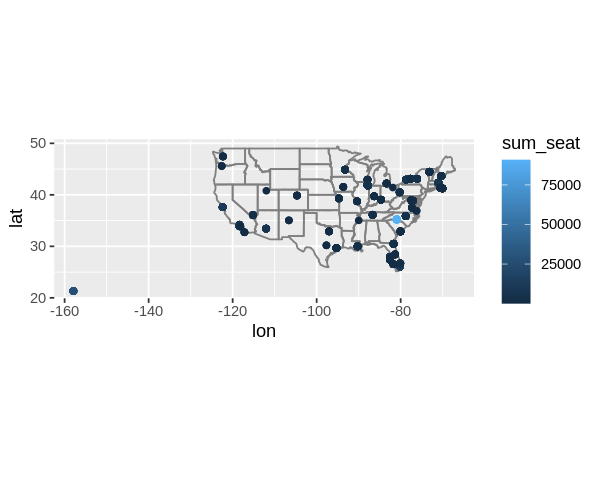

In [ ]:
# Your solution here
airports %>%
  left_join(flights, by=c("faa"="dest")) %>%
  filter(origin %in% c("JFK", "LGA")) %>%
  left_join(planes) %>%
  group_by(faa) %>%
  filter(!is.na(seats)) %>%
  mutate(sum_seat = sum(seats)) %>%
  group_by(faa, lon, lat, sum_seat) %>%
  ggplot(aes(x = lon, y = lat)) +
  borders("state") +
  geom_point(aes(col = sum_seat)) + 
  coord_quickmap()

## Problem 2, Weather Delays (4 points)

Use the tables in the `nycflights13` package to answer the following questions:



**(a)** The average departure delay during the first two days of the year was:

In [ ]:
flights %>% filter(month == 1, day %in% c(1, 2)) %>% summarise(mean(dep_delay, na.rm = T)) %>% print

whereas for the second two days of the year it was: 

In [ ]:
flights %>% filter(month == 1, day %in% c(2, 3)) %>% summarise(mean(dep_delay, na.rm = T)) %>% print

What are the two consecutive days in flights with the highest average departure delay? (Hint: use the `lag()` function.) _2 points_

In [8]:
# flights %>%
#   filter(dep_delay > 0) %>%
#   arrange(as.integer(month), as.integer(day)) %>%
#   group_by(month, day) %>%
#   mutate(mean = mean(dep_delay)) %>% 
#   group_by(month, day, mean) %>%
#   summarise(lag = lag(mean), sum = lag + mean) %>%



flights %>%
filter(dep_delay > 0) %>%
arrange(as.integer(month), as.integer(day)) %>%
group_by(month, day) %>%
summarise(sum = sum(dep_delay), num = n()) %>%
mutate(lag_sum = lag(sum), lag_num = lag(num), need = (sum + lag_sum) / (num + lag_num)) %>%
arrange(desc(need))


`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,day,sum,num,lag_sum,lag_num,need
<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
9,2,46774,460,5800,181,82.01872
3,9,10191,343,67196,653,77.69779
3,8,67196,653,19702,473,77.17407
9,12,41756,414,12170,286,77.03714
6,28,43577,562,38231,526,75.19118
7,10,48129,523,31540,552,74.11070
6,25,42059,649,43134,514,73.25279
7,23,41150,645,42436,499,73.06469
9,3,9477,323,46774,460,71.84036


**(b)** Which of humidity, temperature, or precipitation is more likely to cause flight cancellations? (Here cancelation is defined as it was in Problem 1(a).) Study this by comparing the joint distribution of a) the fraction of flights that were cancelled each day and b) (a summary of) each of the three measurements shown above. 

(Hint: use `pivot_longer` to create a data frame with a variable that contains `humidity`, `temperature`, and `precipitation` as values): _2 points_

Joining with `by = join_by(year, month, day, origin, hour, time_hour)`
`summarise()` has grouped output by 'year', 'month', 'day', 'miss', 'humidity',
'temperature'. You can override using the `.groups` argument.


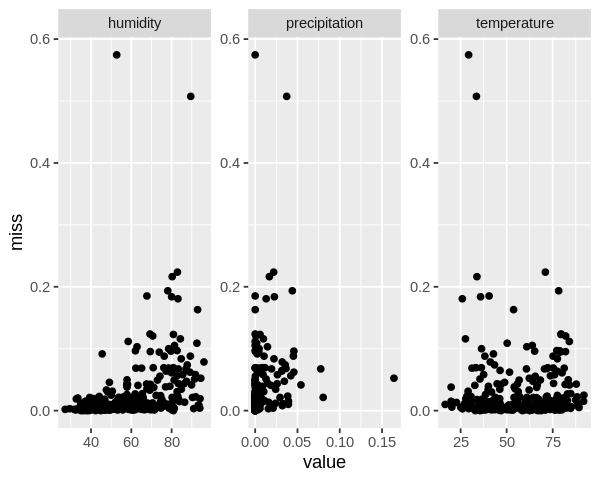

In [ ]:
# Your solution here
flights %>%
  left_join(weather) %>%
  arrange(as.integer(month)) %>%
  mutate(operate = ifelse(!is.na(dep_time),0,1)) %>%
  filter(!is.na(humid)) %>%
  filter(!is.na(temp)) %>%
  filter(!is.na(precip)) %>%
  group_by(year, month, day) %>%
  mutate(miss = mean(operate)) %>%
  mutate(humidity = mean(humid), temperature = mean(temp), precipitation = mean(precip)) %>%
  group_by(year, month, day, miss, humidity, temperature, precipitation) %>% 
  summarise %>%
  pivot_longer(
  cols = c(humidity, temperature, precipitation),
  names_to = "condition",
  values_to = "value"
  ) %>%
  ggplot(aes(x = value, y = miss)) +
  geom_point() +
  facet_wrap(~condition, scales = "free")

# according to the table, as missing proportion increases, humidity tends to increase,
# precipitation tends to decrease, and temperature does not change(except for some outliers) 
# thus, it is most likely that humidity increases the missing rate the most

## Challenge problem: Writing SQL queries ( 2 points)
The following code loads `nycflights13` into a SQLite database:

In [ ]:
install.packages('RSQLite') # if necessary

In [ ]:
# SQLite database
library(nycflights13)
library(DBI)
library(RSQLite)
con <- dbConnect(SQLite(), ":memory:")
copy_to(con, flights, "flights")
copy_to(con, airports, "airports")
copy_to(con, airlines, "airlines")

For each question below, write an appropriate SQL query that produces the answer. For example, if the question was "How many flights departed each month", an appropriate answer would be:

In [ ]:
dbGetQuery(con, "SELECT month, COUNT(month) FROM flights GROUP BY month")

**Your answers should only use SQL -- no dplyr allowed!** (However, it is fine to use dplyr to check your answers.)

**(a)** Find the origin and destination with the longest trip for each carrier in the whole dataset, and order your result based on the maximum `air_time`. : 1/2 point

In [ ]:
# dplyr check
# flights %>%
#   group_by(carrier) %>%
#   filter(!is.na(air_time)) %>%
#   mutate(best = max(air_time)) %>%
#   group_by(carrier, best) %>%
#   mutate(origin = case_when(best == air_time ~ origin)) %>%
#   mutate(dest = case_when(best == air_time ~ dest)) %>%
#   filter(!is.na(dest)) %>%
#   group_by(carrier, best, origin, dest) %>%
#   summarise

dbGetQuery(con, "SELECT carrier, MAX(air_time), origin, dest FROM flights GROUP BY carrier")

carrier,MAX(air_time),origin,dest
<chr>,<dbl>,<chr>,<chr>
9E,272,JFK,SAT
AA,426,JFK,SFO
AS,392,EWR,SEA
B6,413,JFK,SAN
DL,490,JFK,SFO
EV,286,EWR,OKC
F9,278,LGA,DEN
FL,161,LGA,ATL
HA,691,JFK,HNL


**(b)** Find all the busy routes in December 2013 with more than 500 flights in total. (Your query should return the route's origin, destination, and the number of flights.): 1/2 point

In [ ]:
# dplyr check
# flights %>%
#   filter(month == 12) %>%
#   group_by(origin, dest) %>%
#   mutate(count = n()) %>%
#   filter(count > 500) %>%
#   group_by(origin,dest, count) %>%
#   summarise

dbGetQuery(con, "SELECT origin, dest, COUNT(*) as count 
FROM flights 
WHERE month = 12 
GROUP BY origin, dest
HAVING count > 500")

origin,dest,count
<chr>,<chr>,<int>
JFK,LAX,947
JFK,SFO,698
LGA,ATL,862
LGA,CLT,535
LGA,MIA,575
LGA,ORD,637


**(c)** What percentage of the flights were cancelled overall? (A cancelled flight is one for which `dep_delay` is missing.): 1/2 point

In [ ]:
# dplyr check
# flights %>%
#   mutate(status = ifelse(!is.na(dep_delay),0,1)) %>%
#   group_by(year) %>%
#   mutate(mean = mean(status)) %>%
#   group_by(mean) %>%
#   summarise


dbGetQuery(con, "SELECT AVG(status) AS miss
FROM (
  SELECT year, (CASE WHEN dep_delay IS NOT NULL THEN 0 ELSE 1 END) AS status
  FROM flights)")




miss
<dbl>
0.02451184


**(d)** How many flights are there for each weekday? (Your query should return two columns `num` and `weekday`, where `num` is the number of flights, and `weekday` is the day of week with numerical expressions such as Sunday=0, Monday=1, etc.): 1/2 point

In [ ]:
library(lubridate)

In [ ]:
# dplyr check
# flights %>%
#   mutate(date = make_date(year, month, day)) %>%
#   mutate(weekday = wday(date)) %>%
#   group_by(weekday) %>%
#   mutate(num = n()) %>%
#   group_by(weekday, num) %>%
#   summarise


dbGetQuery(con, "SELECT strftime('%w', datetime(time_hour, 'unixepoch')) as weekday, 
COUNT(*) as count FROM flights GROUP BY weekday")

weekday,count
<chr>,<int>
0,43796
1,50709
2,50705
3,49998
4,50137
5,50153
6,41278
